In [6]:
# Data pre-processing
import matplotlib.pyplot as plt
import os
import random
import shutil
import itertools
import time
from scipy import signal
from scipy.io import wavfile
from pydub import AudioSegment
from pydub.silence import split_on_silence
from datetime import datetime

"""
Data prep (pre-processing): typing a single letter repeatedly, e.g., 'hhhhhhhhhh'.

This script first converts the recorded keystrokes (of a single key typed repeatedly) m4a to wav.
It then splits the wav into individual chunks s.t. each chunk contains only one keystroke.

Conventions:
The m4a filename should contain just a single letter corresponding to the letter typed.
For example, if typing 'hhhhhhhhhh', the recorded keystrokes audio should be named 'h.m4a'.
Then the splitted chunks are saved as '<timestamp>_h.wav', 
where each splitted chunk is separated by a 'small' amount of time to distinguish while saving.
"""

# Check the cwd ...
print(os.getcwd())

# File paths
path_project = "/Users/tikka/Documents/Learning/Projects/kido/" # Project path
path_words = path_project + "audioWord/" # Path where the recorded m4a, and the converted wav, files are stored
path_split = path_project + "audioSplit/" # Path where the splitted chunks are stored

# Get the list of all mp4(=m4a) files not yet converted to wav
list_words = os.listdir(path_words)
list_mp4 = [file for file in list_words if file.endswith('.m4a')]
list_wav = [file for file in list_words if file.endswith('.wav')]
list_2con = [file for file in list_mp4 if (file[:-4] + '.wav') not in list_wav]
#print(list_words)
#print(list_mp4)
#print(list_wav)
print(list_2con)

/Users/tikka/Documents/Learning/Projects/kido/code
['a.m4a']


In [7]:
# Convert mp4(=m4a) to wav (need to install pydub and ffmpeg)
# https://pythonbasics.org/convert-mp3-to-wav/
# https://www.youtube.com/watch?v=8nbuqYw2OCw
# https://github.com/jiaaro/pydub
for file in list_2con:
    audio = AudioSegment.from_file(path_words + file, "mp4")
    audio.export(path_words + file[:-4] + ".wav", "wav")

In [9]:
# Get the list of wav files
list_words = os.listdir(path_words)
list_wav = [file for file in list_words if file.endswith('.wav')]
print(list_wav)

# Split the wav files using silence detection (it does NOT check if a file is already split)
# https://stackoverflow.com/questions/45526996/split-audio-files-using-silence-detection
# https://github.com/jiaaro/pydub/issues/169
for file in list_wav:
    audio = AudioSegment.from_wav(path_words + file)
    audio = audio[:-2000]
    average_loudness = audio.dBFS
    print("file, audio length, dBFS:", file, len(audio), average_loudness)
    print(".", end = '')
    chunks = split_on_silence(
        # Audio to be split
        audio,
        
        # Specify that a silence chunk must be at least 100ms long
        min_silence_len = 100,
        
        # Consider a chunk silent if it's quieter than 'average_loudness - 10' dBFS
        silence_thresh = average_loudness - 10,
        
        # Keep some silence padding
        keep_silence = 100
    )
    
    # Export the chunks
    n_chunks = len(chunks)
    print(n_chunks)
    for i in range(len(chunks)):
        mills = int(round(time.time() * 1000))
        chunks[i].export(path_split + str(mills) + "_" + file[:-4] + ".wav", "wav")
        time.sleep(.001)


['h.wav']
file, audio length, dBFS: h.wav 14345 -59.42763781218885
.20


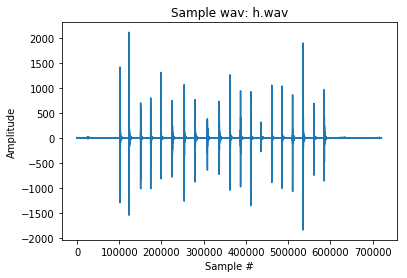

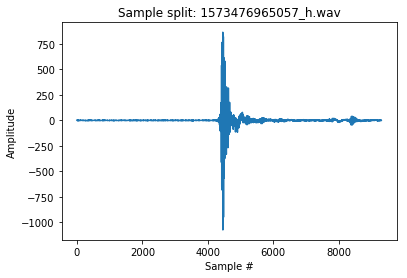

In [13]:
# Plot an original wav
list_words = os.listdir(path_words)
list_words = [file for file in list_words if file.endswith('.wav')]
random_wav = random.choice(list_words)
sample_wav = path_words + random_wav
sample_rate, samples = wavfile.read(sample_wav)
samples1D = samples[:,0]
#print(sample_rate)
#print(samples)
#print(samples1D)

# Plot the wav file
plt.plot(samples1D)
plt.ylabel("Amplitude")
plt.xlabel("Sample #")
plt.title("Sample wav: " + random_wav)
plt.show()

# Plot a splitted wav
list_split = os.listdir(path_split)
list_split = [file for file in list_split if file.endswith('.wav')]
random_wav = random.choice(list_split)
sample_wav = path_split + random_wav
sample_rate, samples = wavfile.read(sample_wav)
samples1D = samples[:,0]
#print(sample_rate)
#print(samples)
#print(samples1D)

# Plot the wav file
plt.plot(samples1D)
plt.ylabel("Amplitude")
plt.xlabel("Sample #")
plt.title("Sample split: " + random_wav)
plt.show()
